In [1]:
from keras.models import load_model
from keras.callbacks import History 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('PCE.csv')
# split data into training and testing sets
training_set = df.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
regressor = load_model('model_best_current.h5')

In [5]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 36, 50)            10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 36, 50)            20200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 36, 50)            20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [6]:
dataset_total = df.iloc[:, 1:2].values

In [7]:
timestemp = 36
prediction_month = 36

In [8]:
result = []
for i in range(0, prediction_month):
    X_test = []
    inputs = dataset_total[len(dataset_total) - timestemp:]
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test.append(inputs[0:timestemp, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted = regressor.predict(X_test)
    predicted = sc.inverse_transform(predicted)
    result.append(predicted[0][0])
    dataset_total = np.append(dataset_total, predicted[0][0])
    

In [9]:
print(result)

[17755.785, 17757.69, 17777.197, 17805.314, 17837.852, 17871.236, 17903.96, 17936.006, 17968.158, 18001.344, 18036.285, 18073.266, 18112.113, 18152.29, 18193.256, 18234.191, 18274.617, 18314.064, 18352.113, 18388.463, 18422.824, 18454.963, 18484.674, 18511.848, 18536.453, 18558.447, 18577.89, 18594.873, 18609.582, 18622.209, 18632.96, 18642.129, 18649.943, 18656.662, 18662.512, 18667.76]


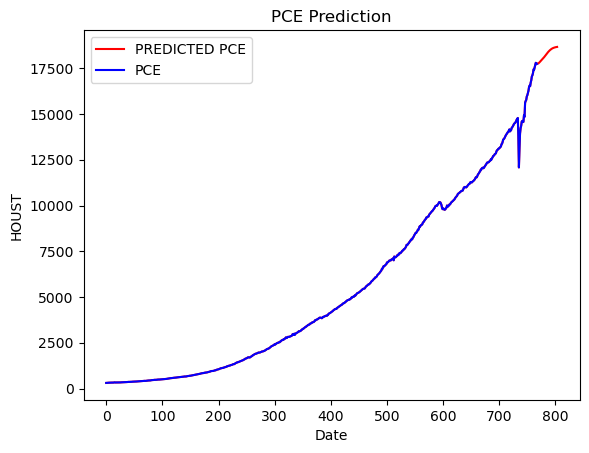

In [12]:
plt.plot(dataset_total, color = 'red', label = 'PREDICTED PCE')
plt.plot(training_set, color = 'blue', label = 'PCE')
plt.title('PCE Prediction')
plt.xlabel('Date')
plt.ylabel('HOUST')
plt.legend()
plt.show()

In [11]:
result = pd.DataFrame({'T102Y2': result})
result.to_csv('result.csv', index=False)